# Modelling Race Results of the Williams F1 Team
*By Colin DiCarlo, for Data Science Fundamentals*

---

In Formula One, a driver can score points by finishing the race in the top ten. Each team has two drivers. In this project, I used data from each race result for the Williams Racing Formula One team to determine whether they scored points in any given race weekend. The dataset starts from the most recent regulation change, at the 2022 Saudi Arabian Grand Prix, going to the most recent race in my dataset, the 2024 British Grand Prix. We'll be using this prediction to determine the odds of the Williams F1 team scoring points at this weekend's upcoming 2024 Azerbaijan Grand Prix, on September 15th. To help account for this specific circuit, I have also inserted the data from the 2019 and 2021 Azerbaijan Grand Prix. There was no Azerbaijan Grand Prix present in the 2020 season.

Before starting, I predicted a 20% chance that the team would score points in any given race. I started by obtaining a database of constructor (team) race results from the 1950-2024 Formula 1 seasons [here](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020/data). In the `constructor_results.csv` file, I filtered out to only results where `constructorId` was `3`, which is listed in the `constructors.csv` file as Williams Racing. Then, using the `races.csv` file as a reference, I filtered the dataset to be only `raceId`s from the 2022 season onward, where the most recent regulation change was implemented. Additionally, I added the 2019 and 2021 Azerbaijan Grand Prix, as stated earlier. This data is stored in the `constructor_results_FILTERED_WILLIAMS_2022_2024.csv` file.

To start extracting the data, I wrote some python code to first convert the CSV file to a Pandas Dataframe, so I could easily work with it, then printed it for debugging purposes. Additionally, I created the `pointsData` dataframe with only the data for points scored.

In [1]:
import numpy as np
import arviz as az
import pymc as pm
import pandas as pd

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/blortle-dev/data-science-lasa/main/Unit%202/Unit%202%20Project/f1-data/constructor_results_FILTERED_WILLIAMS_2022_2024.csv")
pointsData = dataframe["points"]

In [3]:
print(pointsData)

0     0
1     1
2     0
3     2
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    2
15    0
16    2
17    0
18    0
19    0
20    0
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    6
29    0
30    4
31    0
32    0
33    4
34    6
35    0
36    0
37    2
38    3
39    2
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    2
51    0
52    0
53    0
54    2
55    0
56    0
Name: points, dtype: int64


Next, I created a variable to track how many entries scored points. To calculate this, I looped through the `pointsData` dataframe and incremented the variable each time the points value was not equal to 0. I also found the entries where the points value was equal to zero, and printed again for debugging purposes.

In [4]:
pointsEntries = 0

for entry in pointsData:
    if entry != 0:
        pointsEntries += 1

nonPoints = len(pointsData)-pointsEntries

In [5]:
print(pointsEntries)
print(nonPoints)

15
42


The rest of the code to determine the projected results and create the graph was taken from the Unit 2 Notes Answer Key. 

I chose 20% as my prior, since after observing the team for many races, scoring points was an extremely rare but not impossible result for the team. To implement this, I set the `alpha` of `t` to 2, and the `beta` of `t` to 8, so it would match my prior.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


/Users/colindicarlo/PycharmProjects/data-science-project/.venv/lib/python3.12/site-packages/rich/live.py:231: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Sampling: [y]


/Users/colindicarlo/PycharmProjects/data-science-project/.venv/lib/python3.12/site-packages/rich/live.py:231: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Axes(0.125,0.11;0.775x0.77)


[0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]


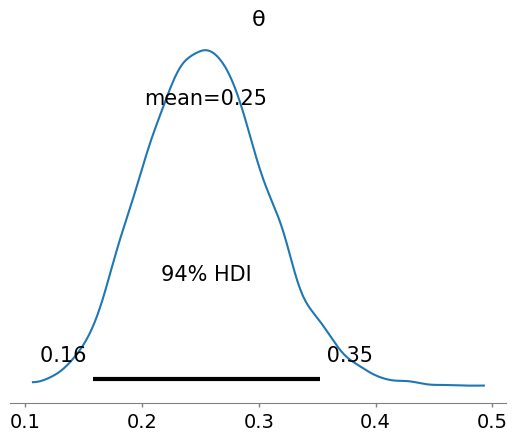

In [6]:
points_data_observed = np.repeat([1,0], repeats = [pointsEntries,nonPoints])

with pm.Model() as pointsData:
    t = pm.Beta('θ' , alpha = 2 , beta = 8)

    y = pm.Bernoulli('y', p = t, observed = points_data_observed)

    pointsSample = pm.sample(2000)

    plot = az.plot_posterior(pointsSample)
    print(plot)
    pm.sample_posterior_predictive(pointsSample, model=pointsData, extend_inferencedata=True)
    pointsValues = az.extract(pointsSample, group="posterior_predictive")
    print(pointsValues.sel(sample=0).sel(draw=0).y.to_series().values)

This prints out both the distribution graph and the next 57 projected results, since the dataset has 57 entries.
The mean for the distribution graph is around 0.25, or 25%. This is higher than my prior, but not high enough to be incredibly surprising. The data printed for the next 57 races predicts that the team will not score points this weekend, but it is still possible to happen.

It's important to also recognize the flaws in these calculations. This project only looks at whether the team scored points or not. However, a team's performance in a race is directly linked to whether they score points, but there are many factors that can influence a team's performance in the weekend. These factors include the following:
- team strategy
- circuit
- time of day
- track conditions
- cockpit temperature
- tyre wear
- tyre temperature
- fuel onboard
- driver mood
- pit stop time
- car performance
- recent upgrades
- handling familiarity
- other teams' performance

# Results
*Post-race weekend*

---
As of Sunday, September 15th at 10:00 AM, the Williams F1 team have scored double points in the race weekend. With the predictions I ran, they were not expected to earn points, however this has been incorrect after the race weekend.

## Full Code

---

In [ ]:
import numpy as np
import arviz as az
import pymc as pm
import pandas as pd

dataframe = pd.read_csv("https://raw.githubusercontent.com/blortle-dev/data-science-lasa/main/Unit%202/Unit%202%20Project/f1-data/constructor_results_FILTERED_WILLIAMS_2022_2024.csv")
pointsData = dataframe["points"]

print(pointsData)

pointsEntries = 0

for entry in pointsData:
    if entry != 0:
        pointsEntries += 1

nonPoints = len(pointsData)-pointsEntries

print(pointsEntries)
print(nonPoints)

points_data_observed = np.repeat([1,0], repeats = [pointsEntries,nonPoints])

with pm.Model() as pointsData:
    t = pm.Beta('θ' , alpha = 2 , beta = 8)

    y = pm.Bernoulli('y', p = t, observed = points_data_observed)

    pointsSample = pm.sample(2000)

    plot = az.plot_posterior(pointsSample)
    print(plot)
    pm.sample_posterior_predictive(pointsSample, model=pointsData, extend_inferencedata=True)
    pointsValues = az.extract(pointsSample, group="posterior_predictive")
    print(pointsValues.sel(sample=0).sel(draw=0).y.to_series().values)